<a href="https://colab.research.google.com/github/akshitgupta29/DS-ML/blob/master/Imbalance_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload() 


Saving playTennis.csv to playTennis.csv


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from graphviz import Source
from IPython.display import Image
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [9]:
data = pd.read_csv('Loan Delinquent_Data-1.csv')
data.head() 

,ID,delinquent,Sdelinquent,term,gender,age,FICO
0,1,No,0,36 months,Female,20-25,300-500
1,2,No,0,36 months,Female,20-25,300-500
2,3,No,0,36 months,Female,20-25,300-500
3,4,No,0,36 months,Female,20-25,300-500
4,5,No,0,36 months,Female,20-25,300-500


In [10]:
data=data.drop(['ID','Sdelinquent'], axis=1)
data.head() 

,delinquent,term,gender,age,FICO
0,No,36 months,Female,20-25,300-500
1,No,36 months,Female,20-25,300-500
2,No,36 months,Female,20-25,300-500
3,No,36 months,Female,20-25,300-500
4,No,36 months,Female,20-25,300-500


In [11]:
data['delinquent'].value_counts() 

Yes    7721
No     3827
Name: delinquent, dtype: int64

In [12]:
data.info()
data.nunique() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   delinquent  11548 non-null  object
 1   term        11548 non-null  object
 2   gender      11548 non-null  object
 3   age         11548 non-null  object
 4   FICO        11548 non-null  object
dtypes: object(5)
memory usage: 451.2+ KB


delinquent    2
term          2
gender        2
age           2
FICO          2
dtype: int64

In [13]:
data.info()
data.nunique() 
df2=pd.get_dummies(data, columns=['term','gender','age','FICO'])
df2.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   delinquent  11548 non-null  object
 1   term        11548 non-null  object
 2   gender      11548 non-null  object
 3   age         11548 non-null  object
 4   FICO        11548 non-null  object
dtypes: object(5)
memory usage: 451.2+ KB


,delinquent,term_36 months,term_60 months,gender_Female,gender_Male,age_20-25,age_>25,FICO_300-500,FICO_>500
0,No,1,0,1,0,1,0,1,0
1,No,1,0,1,0,1,0,1,0
2,No,1,0,1,0,1,0,1,0
3,No,1,0,1,0,1,0,1,0
4,No,1,0,1,0,1,0,1,0


In [14]:
df2.rename(columns={'term_36 months':'term_36_months',
'term_60 months':'term_60_months',
'gender_Female':'gender_Female',
'gender_Male':'gender_Male',
'age_20-25':'age_20_25',
'age_>25':'age_25_gt', 
'FICO_300-500':'FICO_300_500', 
'FICO_>500':'FICO_500_gt'}, 
                 inplace=True)

df2.columns 

Index(['delinquent', 'term_36_months', 'term_60_months', 'gender_Female',
       'gender_Male', 'age_20_25', 'age_25_gt', 'FICO_300_500', 'FICO_500_gt'],
      dtype='object')

In [15]:
x = df2[['term_36_months', 'term_60_months', 'gender_Female',
       'gender_Male', 'age_20_25', 'age_25_gt', 'FICO_300_500', 'FICO_500_gt']].values
y = df2[['delinquent']].values  

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0) 
print("Train:"+str(len(X_train)))
print("Test:"+str(len(X_test))) 
#y_train.value_counts()
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies) 

Train:8083
Test:3465
[['No' 2637]
 ['Yes' 5446]]


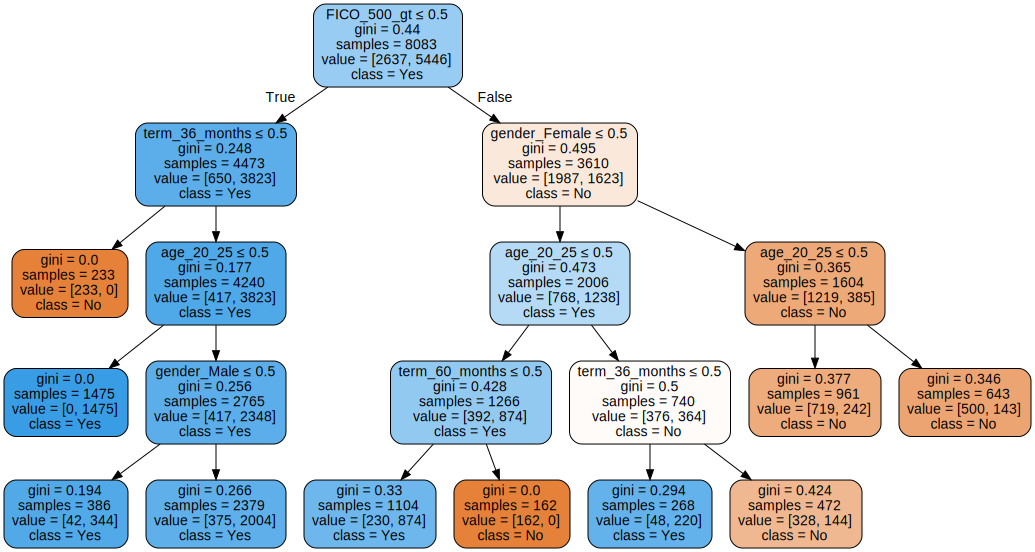

In [19]:
decision_tree = DecisionTreeClassifier(random_state=0, splitter='best')#, min_impurity_decrease=0.0001) #,max_depth=3)
#decision_tree = DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.001,splitter='random',max_leaf_nodes=200) #,max_depth=3)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree, feature_names=['term_36_months', 'term_60_months', 'gender_Female',
       'gender_Male', 'age_20_25', 'age_25_gt', 'FICO_300_500', 'FICO_500_gt'])
#print(r)
dot_data = export_graphviz(decision_tree, out_file=None,feature_names=['term_36_months', 'term_60_months', 'gender_Female',
       'gender_Male', 'age_20_25', 'age_25_gt', 'FICO_300_500', 'FICO_500_gt'],  class_names=['No', 'Yes'],  
filled=True, rounded=True,  special_characters=True) 

graph = graphviz.Source(dot_data,format='png')  
graph  

In [18]:
y_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 902  288]
 [ 209 2066]]
              precision    recall  f1-score   support

          No       0.81      0.76      0.78      1190
         Yes       0.88      0.91      0.89      2275

    accuracy                           0.86      3465
   macro avg       0.84      0.83      0.84      3465
weighted avg       0.86      0.86      0.86      3465

